<a href="https://colab.research.google.com/github/ecierobatto/Week_4_IP_Esther_Robert/blob/main/Week_4_IP_Esther_Robert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset

In [ ]:
# reading our dataset
blueCars = pd.read_csv('http://bit.ly/DSCoreAutolibDataset',',')

In [ ]:
# Let's preview the first rows of our dataset
blueCars.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
# checking the shape of our dataset
blueCars.shape
# our dataset has 16085 rows and 13 columns

(16085, 13)

In [ ]:
# checking for the datatypes 
blueCars.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [ ]:
# changing data from object to datetime64[ns]
#blueCars['date'] = pd.to_datetime(blueCars['date'], format='%m/%d/%y')

In [ ]:
blueCars.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


# Explore Dataset

## Explore and Clean Dataset

In [ ]:
# Missing values
# function for checking missing values
def missing(data):
  # total sum of missing values
  miss = blueCars.isnull().sum().sort_values(ascending=False)
  # percentage of total
  percent = (blueCars.isnull().sum()/len(blueCars)).sort_values(ascending=False)
  # store in a dataframe
  missing_values = pd.DataFrame({'Total Missing':miss, 'Percentage':percent})

  return missing_values


In [ ]:
# checking for the missing_values
missing(blueCars)
# from the output below, our dataset has no missing values

,Total Missing,Percentage
Slots_taken_sum,0,0.0
Slots_freed_sum,0,0.0
Utilib_14_returned_sum,0,0.0
Utilib_14_taken_sum,0,0.0
Utilib_returned_sum,0,0.0
Utilib_taken_sum,0,0.0
BlueCars_returned_sum,0,0.0
BlueCars_taken_sum,0,0.0
day_type,0,0.0
dayOfWeek,0,0.0


In [ ]:
# function for checking duplicates
def duplicates(data):
  # total sum of duplicates
  duplicate = blueCars.duplicated().sum()
  return duplicate

In [ ]:
# checking for duplictes
duplicates(blueCars)

0

In [ ]:
# Outliers
from scipy import stats
# calculating IQR
Q1 = blueCars.quantile(0.25)
Q3 = blueCars.quantile(0.75)
IQR = Q3 - Q1
# function for checking for outliers
def outliers(data):
  # using IQR to detect outliers
  outlier = (blueCars < (Q1 - 1.5 * IQR)) |(blueCars > (Q3 + 1.5 * IQR))
  return outlier


# The data point where we have False that means these values are valid whereas True indicates presence of an outlier.

In [ ]:
outliers(blueCars)

,BlueCars_returned_sum,BlueCars_taken_sum,Postal code,Slots_freed_sum,Slots_taken_sum,Utilib_14_returned_sum,Utilib_14_taken_sum,Utilib_returned_sum,Utilib_taken_sum,date,dayOfWeek,day_type,n_daily_data_points
0,False,False,True,True,True,False,False,False,False,False,False,False,False
1,False,False,True,True,True,False,False,False,False,False,False,False,False
2,False,False,True,True,True,False,False,False,False,False,False,False,False
3,False,False,True,True,True,False,False,False,False,False,False,False,True
4,False,False,True,True,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,False,False,False,False,False,False,False,False,False,False,False,False,False
16081,False,False,False,False,False,False,False,False,False,False,False,False,False
16082,False,False,False,False,False,False,False,False,False,False,False,False,False
16083,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# let's now from the calculated IQR score filter out the outliers by keeping only valid values.
blueCars = blueCars[~((blueCars < (Q1 - 1.5 * IQR)) |(blueCars > (Q3 + 1.5 * IQR))).any(axis=1)]
blueCars.shape

# below is the new shape of our dataset after we've removed outliers

(9783, 13)

# Clean Data

In [ ]:
# Export our clean dataset
blueCars.to_csv('blueCars.csv')

# Univariate Analysis

In [ ]:
# displaying descriptive statistics for all the columns
blueCars.describe(include='all')

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,9783.000000,9783,9783.000000,9783.000000,9783,9783.000000,9783.000000,9783.000000,9783.000000,9783.000000,9783.000000,9783.000000,9783.000000
unique,NaN,130,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,4/27/2018,NaN,NaN,weekday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,78,NaN,NaN,6820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,93104.755188,NaN,1439.698457,2.979454,NaN,49.242870,49.222324,1.498518,1.494327,3.567106,3.568231,0.697434,0.694981
std,1012.235885,NaN,0.564981,2.074932,NaN,46.303795,46.223838,1.909304,1.891761,3.895220,3.898348,1.833390,1.828739
min,91330.000000,NaN,1438.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,92270.000000,NaN,1440.000000,1.000000,NaN,17.000000,17.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,93110.000000,NaN,1440.000000,3.000000,NaN,34.000000,34.000000,1.000000,1.000000,2.000000,2.000000,0.000000,0.000000
75%,94100.000000,NaN,1440.000000,5.000000,NaN,67.000000,67.000000,2.000000,2.000000,5.000000,5.000000,0.000000,0.000000


## Categorical Variables

In [ ]:
# Frequency tables

# function to display frequency tables for categorical data
def Categorical(day):
  if day:
    # day_type
    #return blueCars.day_type.value_counts()
    # dayOfWeek
    return blueCars.dayOfWeek.value_counts()

In [ ]:
# dayOfWeek
Categorical('dayOfWeek')

6    1564
0    1525
1    1520
5    1399
2    1359
4    1283
3    1133
Name: dayOfWeek, dtype: int64

In [ ]:
# day_type
Categorical('day_type')

6    1564
0    1525
1    1520
5    1399
2    1359
4    1283
3    1133
Name: dayOfWeek, dtype: int64

## Visualization

In [ ]:
# function to plot the univariate distribution of the Categorical columns
col_names = ['dayOfWeek', 'day_type']
def drawCategorical(item):
  draw = blueCars[item].value_counts().plot.bar(title='Freq dist '+item)
  if item == col_names:
    return draw

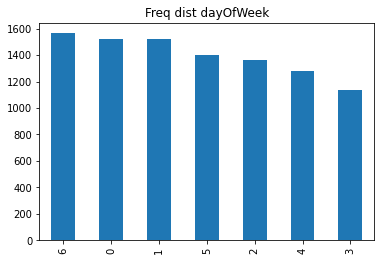

In [ ]:
drawCategorical('dayOfWeek')
plt.savefig('dayOfWeek.eps')


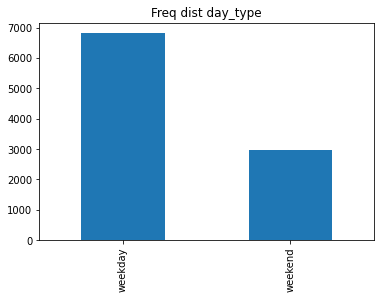

In [ ]:
drawCategorical('day_type')
plt.savefig('day_type.png')

## Numerical Variables

In [ ]:
# Measures of Central Tendency
# 1. Mean
# function for finding mean
def means(data):
  return blueCars[data].mean()



In [ ]:
# Finding the mean of the BlueCars_taken_sum 
means("BlueCars_taken_sum")

49.242870285188594

In [ ]:
# Finding the mean of the BlueCars_returned_sum 
means("BlueCars_returned_sum")

49.22232444035572

In [ ]:
means('Utilib_returned_sum')

1.494326893590923

In [ ]:
means('Utilib_14_taken_sum')

3.5671062046407034

In [ ]:
means('Utilib_14_returned_sum')

3.568230604109169

In [ ]:
means('Slots_taken_sum')

0.694981089645303

In [ ]:
means('Slots_freed_sum')

0.6974343248492283

In [ ]:
# 2. mode
# function for finding mode
def modes(data):
  return blueCars[data].mode()

In [ ]:
# finding the mode for postal code
modes("n_daily_data_points").mode()

0    1440
dtype: int64

In [ ]:
# 3. median
# function for finding mode
def med(data):
  return blueCars[data].median()

In [ ]:
med('BlueCars_taken_sum')

34.0

In [ ]:
med('BlueCars_returned_sum')

34.0

In [ ]:
 # Measures of Dispersion/Variability/Spread

 # 1. Standard deviation
# function for finding standard deviation
def stDev(data):
  return blueCars[data].std() 

In [ ]:
# Finding the std of the BlueCars_taken_sum
stDev('BlueCars_taken_sum')

46.303794622721085

In [ ]:
# Finding the std of the BlueCars_returned_sum
stDev('BlueCars_returned_sum')

46.223837632122425

In [ ]:
# Finding the std of the Utilib_taken_sum
stDev('Utilib_taken_sum')

1.9093044596372373

In [ ]:
# Finding the std of the Utilib_returned_sum
stDev('Utilib_returned_sum')

1.8917612145846532

In [ ]:
# 3. Range
# Function for finding the min and max values 
def raange(vaal):
  # Finding the max val
  vaal_max = blueCars[vaal].max()
  # Finding the min value
  vaal_min = blueCars[vaal].min()

# Calculating the range 
  rang = vaal_max - vaal_min
  return rang

In [ ]:
# Finding the min and max values of the BlueCars_returned_sum
raange('BlueCars_returned_sum')

301

In [ ]:
# Finding the min and max values of the BlueCars_taken_sum
raange('BlueCars_taken_sum')

293

In [ ]:
# 4. Quantiles

# Function for finding the quantiles 
def Quantile(data):
  quantile = blueCars[data].quantile([0.25,0.5,0.75])
  return quantile

In [ ]:
# Finding the quantiles of the BlueCars_taken_sum
Quantile('BlueCars_taken_sum')

0.25    17.0
0.50    34.0
0.75    67.0
Name: BlueCars_taken_sum, dtype: float64

In [ ]:
# Finding the quantiles of the BlueCars_returned_sum
Quantile('BlueCars_returned_sum')

0.25    17.0
0.50    34.0
0.75    67.0
Name: BlueCars_returned_sum, dtype: float64

In [ ]:
# 5. Skewness
# function for determining the skewness
def Skew(val):
  return blueCars[val].skew()

In [ ]:
# Determining the skewness of BlueCars_returned_sum
Skew('BlueCars_returned_sum')

1.797421656681795

In [ ]:
Skew('BlueCars_taken_sum')

1.7911948887384719

In [ ]:
# 6. Kurtosis

# function for determining the kurtosis 
def Kurtosis(val1):
  return blueCars[val1].kurt()

In [ ]:
# Determining the kurtosis of BlueCars_taken_sum
Kurtosis('BlueCars_taken_sum')

3.9107948136076676

In [ ]:
# Determining the kurtosis of BlueCars_returned_sum
Kurtosis('BlueCars_returned_sum')

3.9188404736411444

## Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


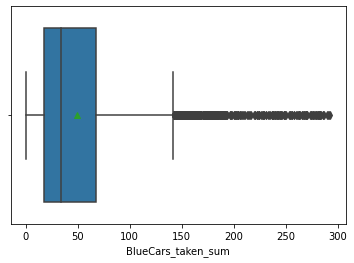

In [ ]:
# Boxplots
# Creating the boxplot the BlueCars_taken_sum
#
sns.boxplot(blueCars["BlueCars_taken_sum"], showmeans=True,)
plt.savefig('BlueCars_taken_sum.jpeg')

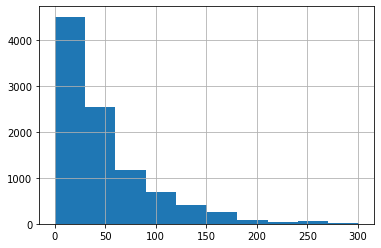

In [ ]:
# Histogram

# Plotting the histogram for BlueCars_returned_sum
#
blueCars['BlueCars_returned_sum'].hist()
plt.savefig('BlueCars_returned_sum.png')

# Bivariate Analysis

## Computations and Visualizations

In [ ]:
# Numerical Analysis
# Using Pandas: function to plot scatterplot to compare the variables
def numericalViz(val1,val2):
  blueCars.plot(x = val1, y = val2, kind='scatter')

# Giving our scatterplot a title
  plt.title(val1+'  '+'vs'+'  '+val2)

# Labelling our x axis
  plt.xlabel(val1)

# Labelling our y axis
  plt.ylabel(val2)

# We then display our scatterplot as shown below
# m, b = np.polyfit(x = val1, y = val2, 1)
# plt.plot(x, m*x + b)
  return plt.show()


# The scatterplot graph shows that the variable diameter at breast is strongly correlated to the clearfell stampage fees.
# This is because as the variable diameter increases the

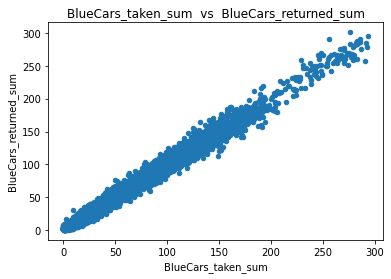

<Figure size 432x288 with 0 Axes>

In [ ]:
# BlueCars_taken_sum vs BlueCars_returned_sum
numericalViz('BlueCars_taken_sum','BlueCars_returned_sum')
plt.savefig('BlueCars_returned_sum.ps')


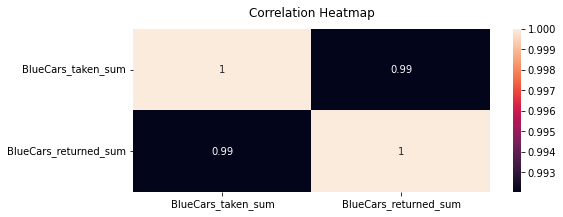

In [ ]:
# correlation between BlueCars_taken_sum and BlueCars_returned_sum
plt.figure(figsize=(8, 3))
cols=['BlueCars_taken_sum','BlueCars_returned_sum']
# plotting heatmap for the correlation
heatmap=sns.heatmap(blueCars[cols].corr(),annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.savefig('correlation.png')

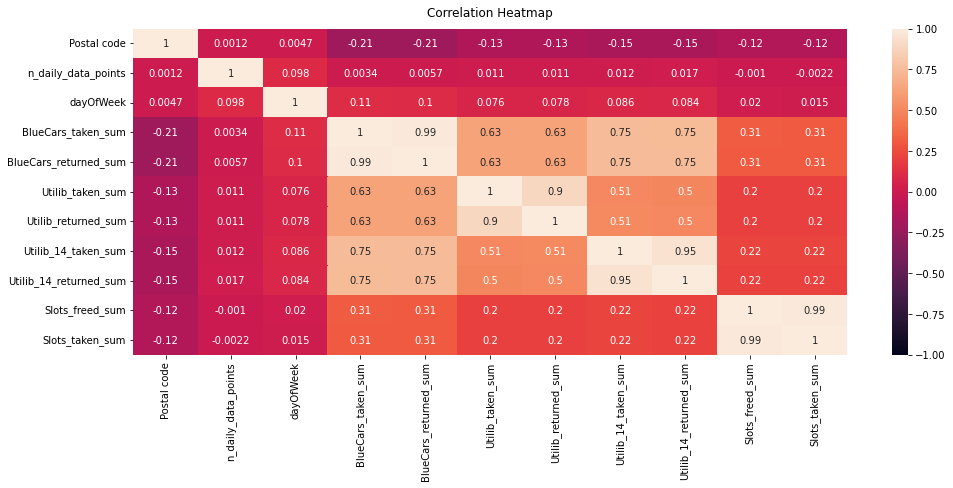

In [ ]:
# Correlation between different numeric data
plt.figure(figsize=(16, 6))
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(blueCars.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.savefig('Correlations.png')
# From the output, BlueCars_taken_sum and BlueCars_returned_sum are higly positively correlated(correlation coefficient is 0.99)
#  Utilib_taken_sum and Utilib_returned_sum are highly positively correlated(correlation coefficient is 0.9)
# Utilib_14_taken_sum and Utilib_14_returned_sum are highly positively correlated(correlation_coefficient is 0.95)

In [ ]:
# Categorical
modes('Postal code')

0     91330
1     91370
2     91400
3     92110
4     92120
5     92140
6     92160
7     92190
8     92210
9     92220
10    92230
11    92250
12    92260
13    92270
14    92290
15    92310
16    92320
17    92330
18    92350
19    92370
20    92380
21    92390
22    92420
23    93130
24    93170
25    93300
26    93310
27    93350
28    93360
29    93500
30    93600
31    93800
32    94100
33    94110
34    94130
35    94140
36    94150
37    94160
38    94220
39    94230
40    94300
41    94340
42    94410
43    94450
44    94500
45    94700
46    95100
47    95870
48    95880
dtype: int64

In [ ]:
# function to 
def location(post_code):
  post = blueCars['Postal code'] == post_code
  if post_code:
 # dayOfWeek   
    return blueCars[post].dayOfWeek.value_counts()
# day_type
    #return blueCars[post].day_type.value_counts()

In [ ]:
location(91330)

6    21
1    20
0    20
5    19
2    18
4    17
3    15
Name: dayOfWeek, dtype: int64

In [ ]:
location(92330)

6    21
1    20
0    20
5    19
2    18
4    17
3    15
Name: dayOfWeek, dtype: int64

In [ ]:
location(93350)

6    21
1    20
0    20
5    19
2    18
4    17
3    15
Name: dayOfWeek, dtype: int64

In [ ]:
location(94450)

6    21
1    20
0    20
5    19
2    18
4    17
3    15
Name: dayOfWeek, dtype: int64

In [ ]:
location(95880)

6    21
1    20
0    20
5    19
2    18
4    17
3    15
Name: dayOfWeek, dtype: int64

In [ ]:
location(91330)

6    21
1    20
0    20
5    19
2    18
4    17
3    15
Name: dayOfWeek, dtype: int64

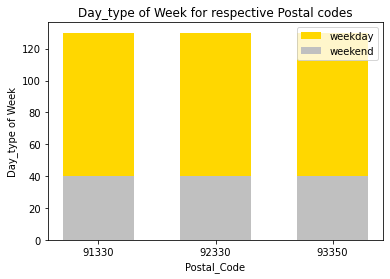

<Figure size 432x288 with 0 Axes>

In [ ]:
# Stacked Column Chart
# In this example, we will first create a stacked column chart from an array and numpy arrays 
# 
postal = ['91330', '92330', '93350']

weekday   = np.array([90,90,90])
weekend   = np.array([40,40,40])


X = [post for post in postal]

# We stack the weekday bars on top of the weekend bars and similarly weekend bar on bottom
# by passing the parameter bottom in the plt.bar () as shown below
# 
plt.bar(X, weekday, width=0.6, label='weekday', color='gold', bottom=weekend)
plt.bar(X, weekend, width=0.6, label='weekend', color='silver')


# labeling our y axis
plt.ylabel("Day_type of Week")

# Labeling our x axis
plt.xlabel("Postal_Code")

# Creating a key/legend for our chart
plt.legend(loc="upper right")

# Adding a title
plt.title("Day_type of Week for respective Postal codes")

# Displaying our chart
plt.show()
plt.savefig('Day_type of Week for respective Postal codes.eps')

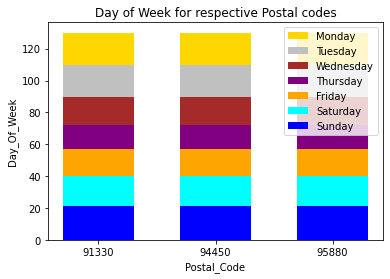

<Figure size 432x288 with 0 Axes>

In [ ]:
# In this example, we will first create a stacked column chart from an array and numpy arrays 
# 
posts = ['91330', '94450', '95880']
Monday   = np.array([20,20,20])
Tuesday   = np.array([20,20,20])
Wednesday   = np.array([18,18,18])
Thursday   = np.array([15,15,15])
Friday   = np.array([17,17,17])
Saturday   = np.array([19,19,19])
Sunday   = np.array([21,21,21])

X = [post1 for post1 in posts]

# We stack the Monday bars on top of the Tuesday bars and similarly Tuesday bar on top of Wednesday bars etc
# by passing the parameter bottom in the plt.bar () as shown below
# 
plt.bar(X, Monday, width=0.6, label='Monday', color='gold', bottom=Tuesday+Wednesday+Thursday+Friday+Saturday+Sunday)
plt.bar(X, Tuesday, width=0.6, label='Tuesday', color='silver', bottom=Wednesday+Thursday+Friday+Saturday+Sunday)
plt.bar(X, Wednesday, width=0.6, label='Wednesday', color='brown', bottom=Thursday+Friday+Saturday+Sunday)
plt.bar(X, Thursday, width=0.6, label='Thursday', color='purple', bottom=Friday+Saturday+Sunday)
plt.bar(X, Friday, width=0.6, label='Friday', color='orange', bottom=Saturday+Sunday)
plt.bar(X, Saturday, width=0.6, label='Saturday', color='cyan', bottom=Sunday)
plt.bar(X, Sunday, width=0.6, label='Sunday', color='blue')


# labeling our y axis
plt.ylabel("Day_Of_Week")

# Labeling our x axis
plt.xlabel("Postal_Code")

# Creating a key/legend for our chart
plt.legend(loc="upper right")

# Adding a title
plt.title("Day of Week for respective Postal codes")

# Displaying our chart
plt.show()
plt.savefig('Day of Week for respective Postal codes.jpeg')

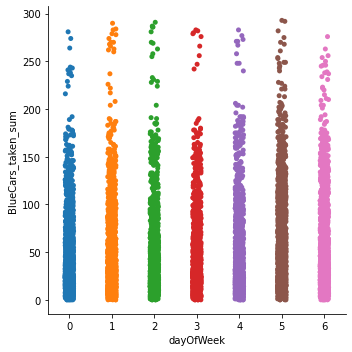

In [ ]:
# Categorical Numerical

# Scatter Plot
# Plotting dayOfWeek vs BlueCars_taken_sum
sns.catplot(x="dayOfWeek", y="BlueCars_taken_sum", data=blueCars)
plt.savefig('dayOfWeek vs BlueCars_taken_sum.png')

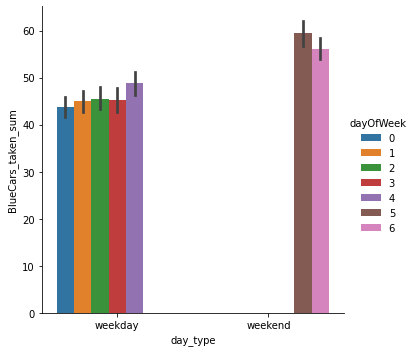

In [ ]:
# Barplot 
# Plotting the relationship between day_type, BlueCars_taken_sum and dayOfWeek
sns.catplot(x="day_type", y="BlueCars_taken_sum", hue="dayOfWeek", kind="bar", data=blueCars)
plt.savefig('day_type vs BlueCars_taken_sum vs dayOfWeek.eps')

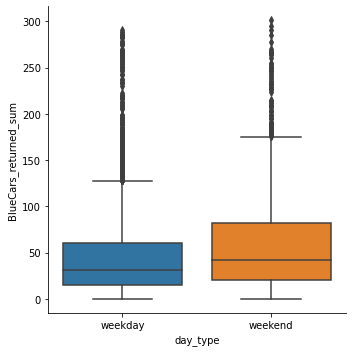

In [ ]:
# Boxplots
# Plotting Boxplot for  BlueCars_returned_sum vs dayOfWeek
sns.catplot(x="day_type", y="BlueCars_returned_sum", kind="box", data=blueCars)
plt.savefig('day_type vs BlueCars_returned_sum vs dayOfWeek.ps')

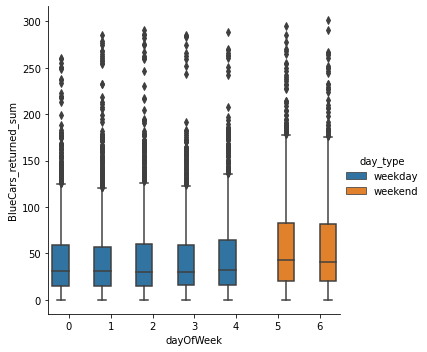

In [ ]:
# Plotting Boxplot to compare BlueCars_returned_sum with dayOfWeek and day_type
sns.catplot(x="dayOfWeek", y="BlueCars_returned_sum", hue="day_type", kind="box", data=blueCars)
plt.savefig(' BlueCars_returned_sum vs dayOfWeek vs day_types.jpg')

# Hpothesis Testing

In [ ]:
# To investigate a claim about the blue cars for the Autolib electric car-sharing service company, 
# a sample of 52 postal codes were taken to test the hypothesis 
# that the number of blue cars in postal code 95880  is greater than in postal code 91330 at 0.05 level of significance
# Null hypothesis
# The  average number of Bluecars taken in postal code 95880  is greater than in postal code 91330
# Alternative hypothesis
# The average number of Bluecars taken in postal code 95880  is not greater than in postal code 91330



In [ ]:
# Identifying rows with postal code '91330'
post=blueCars['Postal code']==91330
# generating the population
pop_count = blueCars.groupby([post])['BlueCars_taken_sum'].count()
pop_count

# from the output, there are 130 '91330' postal codes 

Postal code
False    9653
True      130
Name: BlueCars_taken_sum, dtype: int64

In [ ]:
# identify the postal codes with 91330 
postal_91330 = blueCars[post]
# select the 'BlueCars_taken_sum' column 
bluecars_taken = postal_91330['BlueCars_taken_sum']

In [ ]:
# sum of bluecars taken from postal code 91330
bluecars_taken.sum()

1584

In [ ]:
# Identify the mean of Bluecars_taken from postal code 91330
bluecars_taken_mean = bluecars_taken.mean()
bluecars_taken_mean

12.184615384615384

In [ ]:
# Identify the mean of Bluecars_taken from postal code 91330
bluecars_taken_std = bluecars_taken.std()
bluecars_taken_std

8.395074797682042

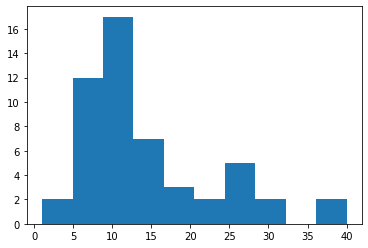

In [ ]:
# checking for normality of our new data
from matplotlib import pyplot
# histogram plot
pyplot.hist(blueCars['BlueCars_taken_sum'])
# visualizing
pyplot.show()

In [ ]:

# statistical representation of the hypothesis
# H0 : mean <= bluecars_taken.mean()
# H1 : mean> bluecars_taken.mean()

In [ ]:
# obtaining a random sample of size 52 (40% of the population) from the population of 130
blueCars = blueCars[post].sample(frac=0.40,replace=False)

print(blueCars)

      Postal code       date  ...  Slots_freed_sum  Slots_taken_sum
3970        91330  3/16/2018  ...                0                0
4053        91330  6/18/2018  ...                0                1
4036        91330   6/1/2018  ...                0                0
3903        91330   1/5/2018  ...                1                1
3989        91330   4/4/2018  ...                3                3
3919        91330  1/21/2018  ...                5                5
4020        91330   5/5/2018  ...                1                0
4015        91330  4/30/2018  ...                0                0
4012        91330  4/27/2018  ...                2                1
4017        91330   5/2/2018  ...                1                0
3975        91330  3/21/2018  ...                1                1
4047        91330  6/12/2018  ...                0                0
3910        91330  1/12/2018  ...                1                2
3977        91330  3/23/2018  ...               

In [ ]:
# sample mean of BlueCars_taken_sum
blueCars['BlueCars_taken_sum'].mean()

11.288461538461538

In [ ]:
# sample standrd deviation of BlueCars_taken_sum
blueCars['BlueCars_taken_sum'].std()

7.7265433472239655

In [ ]:
# calculating  z-score
zscore = ( 11.288 - 12.184 ) / 8.395
zscore

-0.10673019654556272

In [ ]:
# calculating the P-value
from scipy.stats import norm
prob = stats.norm.cdf(zscore)
prob

 

0.4575015130246944

In [ ]:
# from the result the p-value is 0.457
# So, we fail to reject the null hypothesis and the p-value should be greater than 0.05 in either direction of the bell curve. 
# Since the p-value is greater than 0.05%, we cannot reject the null hypothesis 
# and clearly state that the average number of Bluecars taken in postal code 95880 
# is not greater than in average number of Bluecars taken in postal code 91330

In [ ]:

# buildind a confidence interval around BlueCars_taken_sum
import scipy.stats as st
#create 95% confidence interval for population mean weight
st.norm.interval(alpha=0.95, loc=np.mean(blueCars['BlueCars_taken_sum']), scale=st.sem(blueCars['BlueCars_taken_sum']))
# from the output, the confidence interval around BlueCars_taken_sum is (11.362, 16.291)

(11.362321809991448, 16.291524343854704)

In [ ]:
# power of test
# importing TTestPower
from statsmodels.stats.power import TTestPower
  
 # calculating power of test 
power = TTestPower()
n_test = power.solve_power(nobs=52, effect_size = 0.9,
                           power = None, alpha = 0.05)
print('Power: {:.3f}'.format(n_test))

# This tells us that a minimum sample size of 52 would result in a power of 1.000

Power: 1.000
